In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
data=pd.read_csv('Advertising.csv',index_col=0)
data.head(10)

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
6,8.7,48.9,75.0,7.2
7,57.5,32.8,23.5,11.8
8,120.2,19.6,11.6,13.2
9,8.6,2.1,1.0,4.8
10,199.8,2.6,21.2,10.6


In [5]:
data.shape

(200, 4)

In [6]:
#Our features are TV, Radio and Newspaper
#Our response is sales

## Visualizing our data using scatter plots

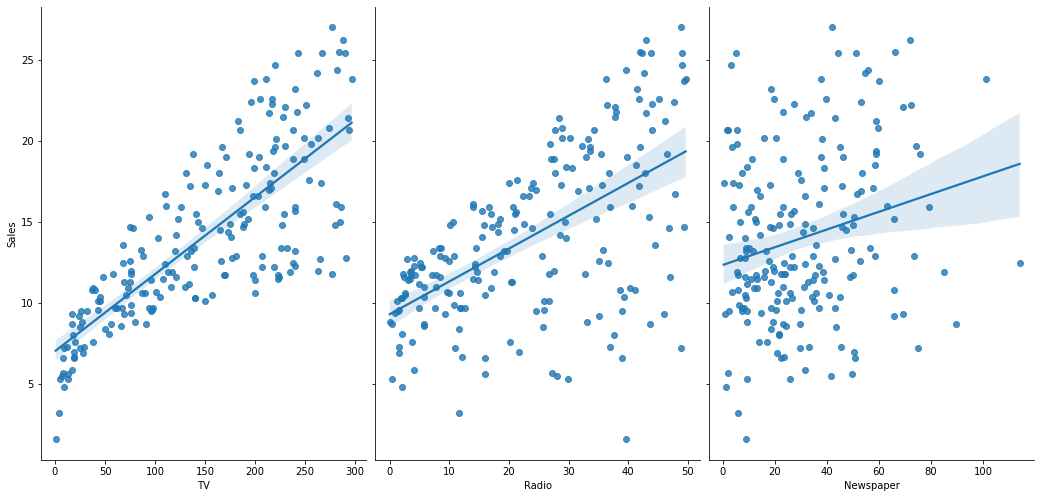

In [16]:
sns.pairplot(data,x_vars=['TV','Radio','Newspaper'],y_vars=['Sales'],height=7,aspect=0.7,kind='reg')

## Preparing our dataset

In [18]:
X=data[['TV','Radio','Newspaper']]
X.shape

(200, 3)

In [20]:
y=data['Sales']
y.shape

(200,)

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,shuffle=True,test_size=0.4)

In [25]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 3)
(80, 3)
(120,)
(80,)


## Training our model using linear regression

In [27]:
from sklearn.linear_model import LinearRegression

In [29]:
linReg=LinearRegression()

In [33]:
linReg.fit(X_train,y_train)
yPred=linReg.predict(X_test)
yPred

array([20.23278083, 18.6535881 ,  9.93433176,  6.54239911, 12.19297503,
       12.25611746, 12.70532911, 16.63414233, 15.39603796,  8.97406281,
       15.10492218,  6.78432419,  7.47194165, 12.55935019, 17.14596555,
       11.59435244, 13.83311356,  7.55958734,  8.91569671, 13.09745015,
       17.37769337,  5.6818311 , 21.84861307, 18.73849414, 19.79721521,
       14.01943504, 23.74769409, 12.45779476, 20.61724422, 16.49142527,
       10.3671832 , 11.00300966,  9.63633985,  9.66901609,  6.00992579,
       16.07306332, 17.45828894, 18.66811083, 12.56426699, 20.08721203,
        7.07000026, 19.5217652 , 14.54603716,  9.69727268, 11.43297746,
       17.28728998, 11.46737553, 20.85970484, 16.52845319, 13.72928602,
       18.39585868, 15.00817411,  7.72526327, 10.1210235 , 14.57008407,
       10.16422735, 14.03190902,  9.76308773, 24.41644115, 17.42500302,
       13.62661041, 12.75909331,  9.93516492, 15.72122739, 21.14275048,
       16.87907133, 15.43109716, 18.20405288, 19.42920366, 13.27

In [35]:
#Interpreting our linear regression coefficients and intercept
print(linReg.intercept_)
print(linReg.coef_)

2.751697609976194
[0.04626373 0.19121668 0.00339207]


In [39]:
featuresNames=['TV', 'Radio', 'Newspaper']
list(zip(featuresNames,linReg.coef_))

[('TV', 0.0462637340675093),
 ('Radio', 0.19121668211069184),
 ('Newspaper', 0.0033920727330136874)]

## Metrics evaluator

In [41]:
#Using RMSE is the best method for checking for errors as it accounts for big errors
#There are other metrics evaluators eg Mean Absolute Error and Mean Squared Error
from sklearn import metrics
print(np.sqrt(metrics.mean_squared_error(y_test,yPred)))

1.553541393287545


## Choosing the right features to use

In [42]:
#We check for the value of RMS , if RMS is lesser, then those features should be chosen
X=data[['TV','Radio']]
X_train,X_test,y_train,y_test=train_test_split(X,y)

In [43]:
linReg.fit(X_train,y_train)
yPred=linReg.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test,yPred)))

1.7356191418321194


In [44]:
X=data[['TV','Newspaper']]
X_train,X_test,y_train,y_test=train_test_split(X,y)
linReg.fit(X_train,y_train)
yPred=linReg.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test,yPred)))

3.3195971723014894


In [45]:
X=data[['Radio','Newspaper']]
X_train,X_test,y_train,y_test=train_test_split(X,y)
linReg.fit(X_train,y_train)
yPred=linReg.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test,yPred)))

5.2098532428580056


Therefore the first model with features as TV, Radio And Newspaper should be chosen